In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%cd ../..

/nfs/homedirs/fuchsgru/MastersThesis


In [3]:
import configuration
import data.construct
from copy import deepcopy
import data.constants as dconstants
import data.util as dutil

In [12]:

cfg = deepcopy(configuration.default_configuration)
cfg['data']['dataset'] = 'cora_full'
cfg['data']['type'] = 'npz'
cfg['data']['num_dataset_splits'] = 5
cfg['data']['base_labels'] = ['Artificial_Intelligence/NLP', 'Artificial_Intelligence/Data_Mining','Artificial_Intelligence/Speech', 'Artificial_Intelligence/Knowledge_Representation','Artificial_Intelligence/Theorem_Proving', 'Artificial_Intelligence/Games_and_Search','Artificial_Intelligence/Vision_and_Pattern_Recognition', 'Artificial_Intelligence/Planning','Artificial_Intelligence/Agents','Artificial_Intelligence/Robotics', 'Artificial_Intelligence/Expert_Systems','Artificial_Intelligence/Machine_Learning/Case-Based', 'Artificial_Intelligence/Machine_Learning/Theory', 'Artificial_Intelligence/Machine_Learning/Genetic_Algorithms', 'Artificial_Intelligence/Machine_Learning/Probabilistic_Methods', 'Artificial_Intelligence/Machine_Learning/Neural_Networks','Artificial_Intelligence/Machine_Learning/Rule_Learning','Artificial_Intelligence/Machine_Learning/Reinforcement_Learning','Operating_Systems/Distributed', 'Operating_Systems/Memory_Management', 'Operating_Systems/Realtime', 'Operating_Systems/Fault_Tolerance']
cfg['data']['corpus_labels'] = ['Artificial_Intelligence/Machine_Learning/Case-Based', 'Artificial_Intelligence/Machine_Learning/Theory', 'Artificial_Intelligence/Machine_Learning/Genetic_Algorithms', 'Artificial_Intelligence/Machine_Learning/Probabilistic_Methods', 'Artificial_Intelligence/Machine_Learning/Neural_Networks','Artificial_Intelligence/Machine_Learning/Rule_Learning','Artificial_Intelligence/Machine_Learning/Reinforcement_Learning']
cfg['data']['train_labels'] = ['Artificial_Intelligence/Machine_Learning/Case-Based', 'Artificial_Intelligence/Machine_Learning/Theory', 'Artificial_Intelligence/Machine_Learning/Genetic_Algorithms', 'Artificial_Intelligence/Machine_Learning/Probabilistic_Methods', 'Artificial_Intelligence/Machine_Learning/Neural_Networks','Artificial_Intelligence/Machine_Learning/Rule_Learning','Artificial_Intelligence/Machine_Learning/Reinforcement_Learning']
cfg['data']['setting'] = dconstants.TRANSDUCTIVE[0]
#cfg['data']['ood_type'] = dconstants.LEFT_OUT_CLASSES[0]
cfg['data']['ood_type'] = dconstants.PERTURBATION[0]
cfg['data']['ood_sampling_strategy'] = dconstants.SAMPLE_ALL[0]
cfg['data']['left_out_class_labels'] = ['Artificial_Intelligence/NLP', 'Artificial_Intelligence/Data_Mining', 'Artificial_Intelligence/Speech', 'Artificial_Intelligence/Knowledge_Representation', 'Artificial_Intelligence/Theorem_Proving', 'Artificial_Intelligence/Games_and_Search', 'Artificial_Intelligence/Vision_and_Pattern_Recognition', 'Artificial_Intelligence/Planning', 'Artificial_Intelligence/Agents', 'Artificial_Intelligence/Robotics', 'Artificial_Intelligence/Expert_Systems', 'Operating_Systems/Distributed', 'Operating_Systems/Memory_Management', 'Operating_Systems/Realtime', 'Operating_Systems/Fault_Tolerance']
cfg['data']['drop_train_vertices_portion'] = 0.1
cfg['perturbation_budget'] = 0.1

if cfg['data']['ood_type'] in dconstants.PERTURBATION:
    cfg['data']['left_out_class_labels'] = []
    cfg['data']['base_labels'] = cfg['data']['train_labels']

cfg = configuration.get_experiment_configuration(cfg)

In [6]:
cfg = deepcopy(configuration.default_configuration)
cfg["data"] = {
            "base_labels" : [ 
                "Artificial_Intelligence/Machine_Learning/Case-Based", 
                "Artificial_Intelligence/Machine_Learning/Theory", 
                "Artificial_Intelligence/Machine_Learning/Genetic_Algorithms", 
                "Artificial_Intelligence/Machine_Learning/Probabilistic_Methods", 
                "Artificial_Intelligence/Machine_Learning/Neural_Networks", 
                "Artificial_Intelligence/Machine_Learning/Rule_Learning", 
                "Artificial_Intelligence/Machine_Learning/Reinforcement_Learning", 
                "Operating_Systems/Distributed", 
                "Operating_Systems/Memory_Management", 
                "Operating_Systems/Realtime", 
                "Operating_Systems/Fault_Tolerance"
            ],
            "corpus_labels" : [ 
                "Artificial_Intelligence/Machine_Learning/Case-Based", 
                "Artificial_Intelligence/Machine_Learning/Theory", 
                "Artificial_Intelligence/Machine_Learning/Genetic_Algorithms", 
                "Artificial_Intelligence/Machine_Learning/Probabilistic_Methods", 
                "Artificial_Intelligence/Machine_Learning/Neural_Networks", 
                "Artificial_Intelligence/Machine_Learning/Rule_Learning", 
                "Artificial_Intelligence/Machine_Learning/Reinforcement_Learning"
            ],
            "dataset" : "cora_full",
            "drop_train_vertices_portion" : 0.1,
            "left_out_class_labels" : [ 
                "Operating_Systems/Distributed", 
                "Operating_Systems/Memory_Management", 
                "Operating_Systems/Realtime", 
                "Operating_Systems/Fault_Tolerance"
            ],
            "num_dataset_splits" : 5,
            "preprocessing" : "bag_of_words",
            "setting" : "transductive",
            "split_type" : "uniform",
            "test_portion_fixed" : 0.2,
            "train_labels" : [ 
                "Artificial_Intelligence/Machine_Learning/Case-Based", 
                "Artificial_Intelligence/Machine_Learning/Theory", 
                "Artificial_Intelligence/Machine_Learning/Genetic_Algorithms", 
                "Artificial_Intelligence/Machine_Learning/Probabilistic_Methods", 
                "Artificial_Intelligence/Machine_Learning/Neural_Networks", 
                "Artificial_Intelligence/Machine_Learning/Rule_Learning", 
                "Artificial_Intelligence/Machine_Learning/Reinforcement_Learning"
            ],
            "train_portion" : 20,
            "type" : "npz"
        }
cfg = configuration.get_experiment_configuration(cfg)

In [7]:
data_list, fixed_vertices = data.construct.load_data_from_configuration(cfg['data'])

In [14]:
data_list = [{k : v[0] for k, v in d.items()} for d in data_list]

In [15]:
dataset_names = {
    dconstants.TRAIN : 'Training',
    dconstants.VAL : 'Validation',
    dconstants.TEST : 'Testing',
    dconstants.OOD_VAL : 'OOD Validation',
    dconstants.OOD_TEST : 'OOD Testing'
}

In [16]:
# Make a data frame
data_labels = []
for split_idx, data_dict in enumerate(data_list):
    for name, dataset in data_dict.items():
        idx_to_label = {idx : label for label, idx in dataset.label_to_idx.items()}
        y = dataset.y[dataset.mask].cpu().numpy()
        distribution = ['Out of\nDistribution' if i else 'In\nDistribution' for i in dataset.is_out_of_distribution[dataset.mask].cpu()]
        labels = [idx_to_label[i] for i in y]
        data_labels += [({'Dataset' : dataset_names[name], 'Split' : split_idx + 1, 'Label' : label, 'Type' : d}) for (label, d) in zip(labels, distribution)]
        
df_labels = pd.DataFrame(data_labels)

In [17]:
df_labels

,Dataset,Split,Label,Type
0,Training,1,Artificial_Intelligence/Machine_Learning/Reinf...,In\nDistribution
1,Training,1,Artificial_Intelligence/Machine_Learning/Reinf...,In\nDistribution
2,Training,1,Artificial_Intelligence/Machine_Learning/Reinf...,In\nDistribution
3,Training,1,Artificial_Intelligence/Machine_Learning/Reinf...,In\nDistribution
4,Training,1,Artificial_Intelligence/Machine_Learning/Reinf...,In\nDistribution
...,...,...,...,...
6334,OOD Testing,5,Artificial_Intelligence/Machine_Learning/Proba...,Out of\nDistribution
6335,OOD Testing,5,Artificial_Intelligence/Machine_Learning/Proba...,Out of\nDistribution
6336,OOD Testing,5,Artificial_Intelligence/Machine_Learning/Neura...,In\nDistribution
6337,OOD Testing,5,Artificial_Intelligence/Machine_Learning/Neura...,In\nDistribution


/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


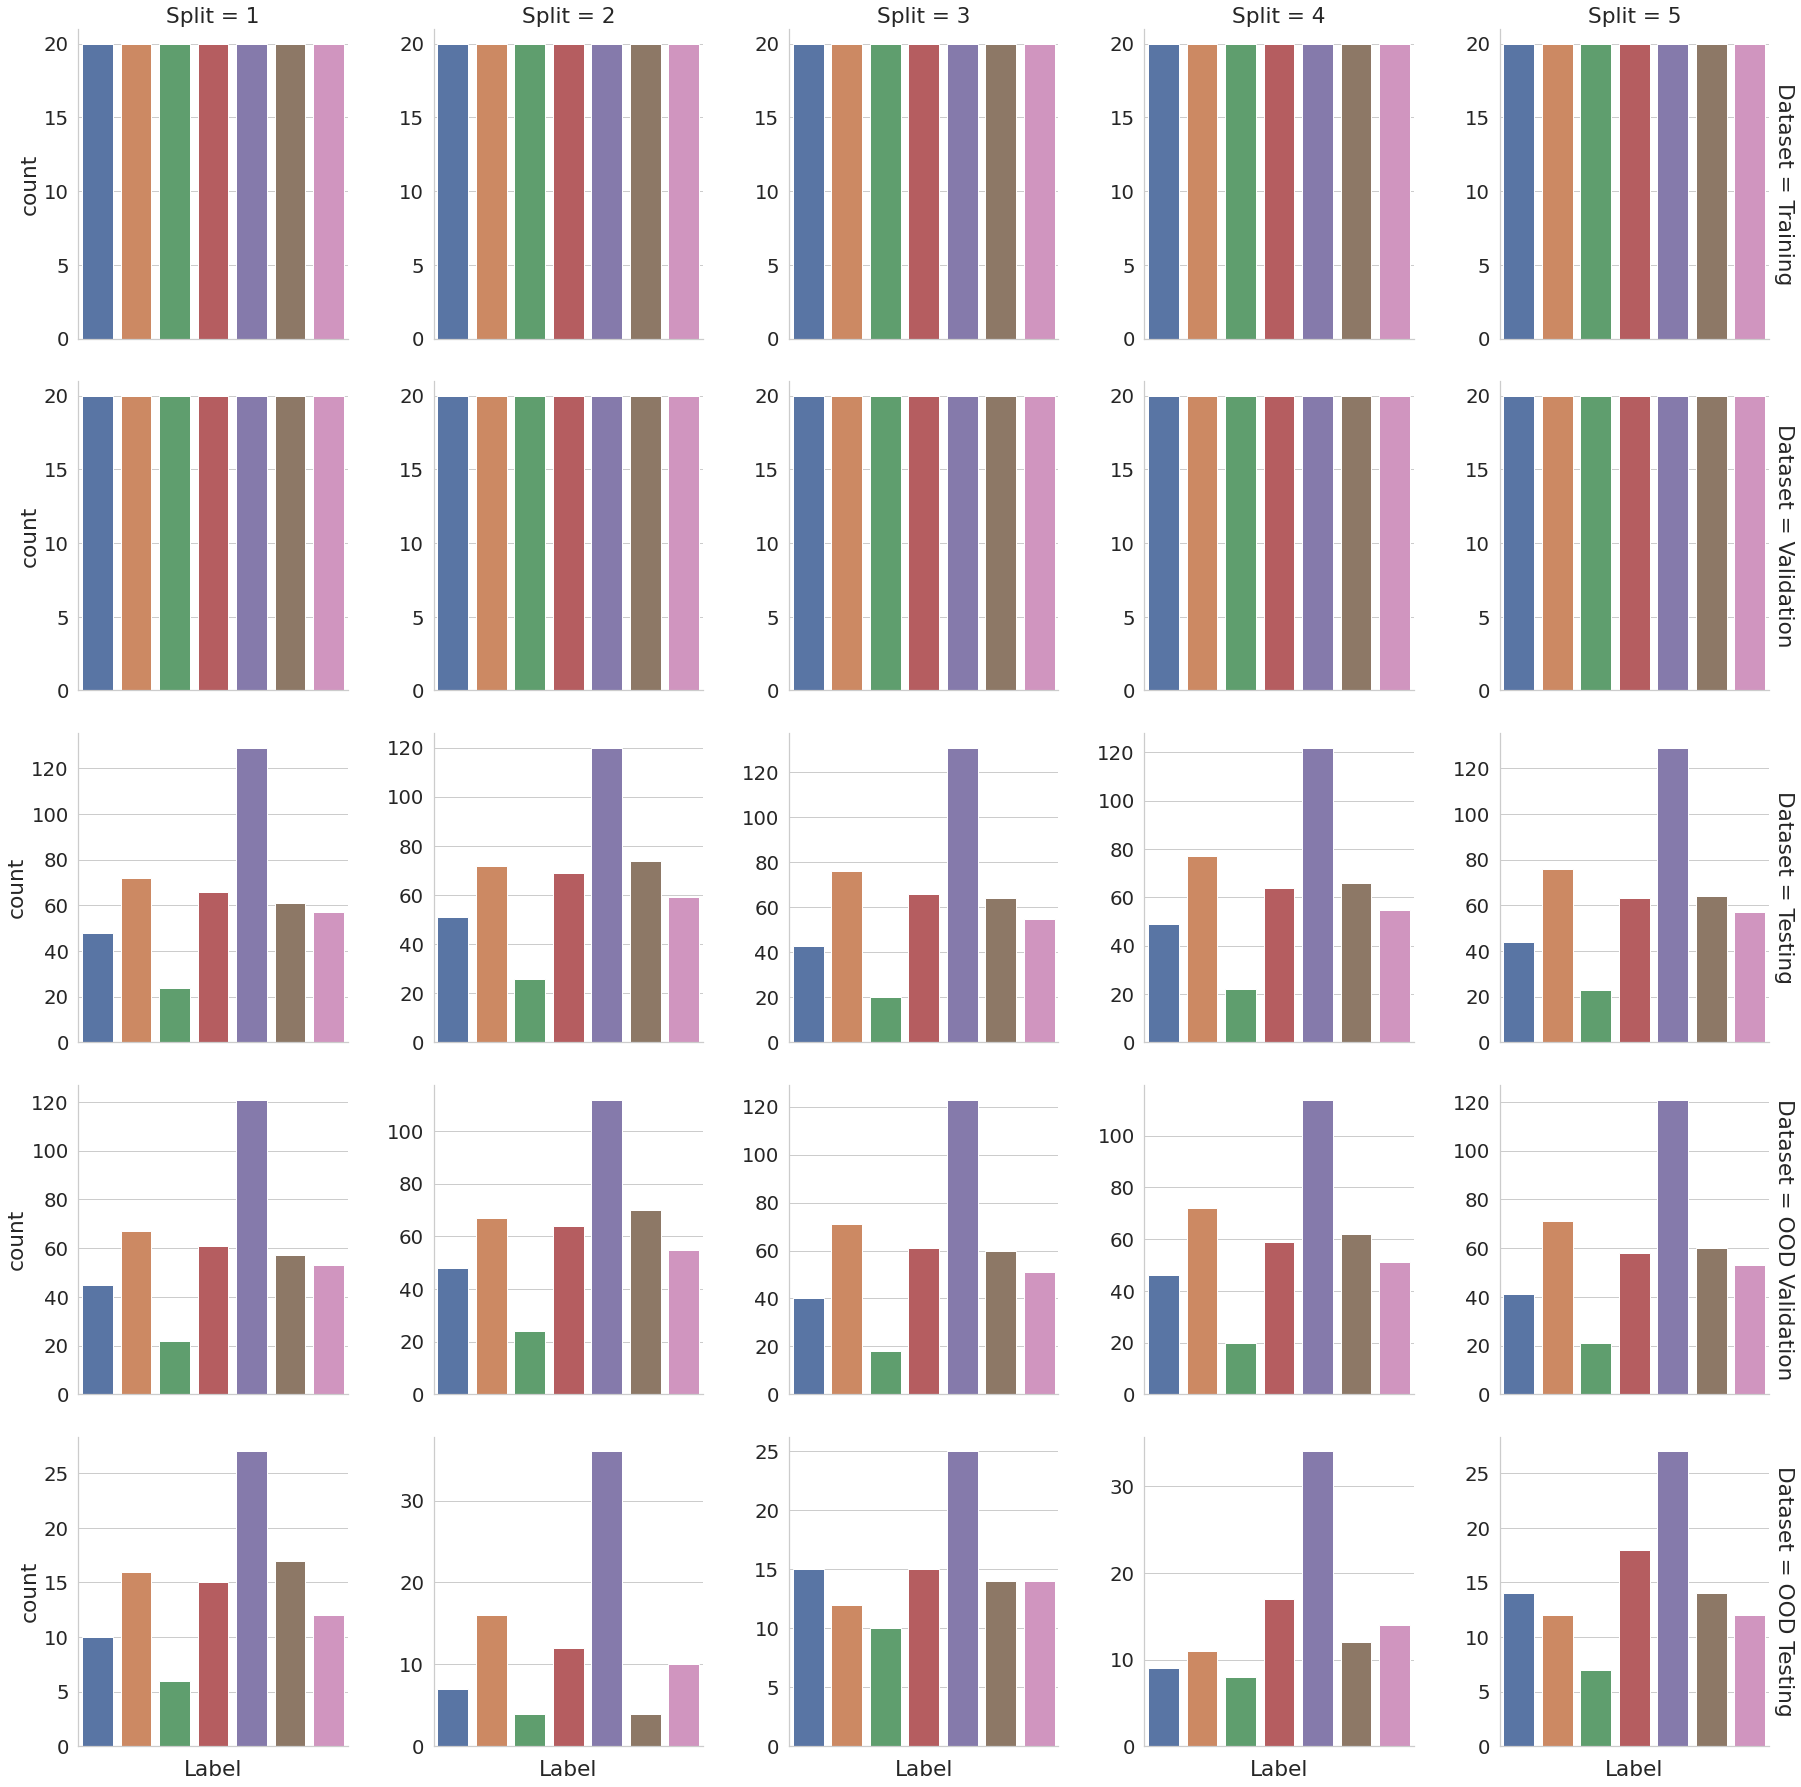

In [18]:
sns.set(context='notebook', font_scale=1.8)
sns.set_style("whitegrid")
g = sns.catplot(data = df_labels, row = 'Dataset', col = 'Split', kind = 'count', x = 'Label', sharey = False, margin_titles=True)
g.set(xticklabels=[])

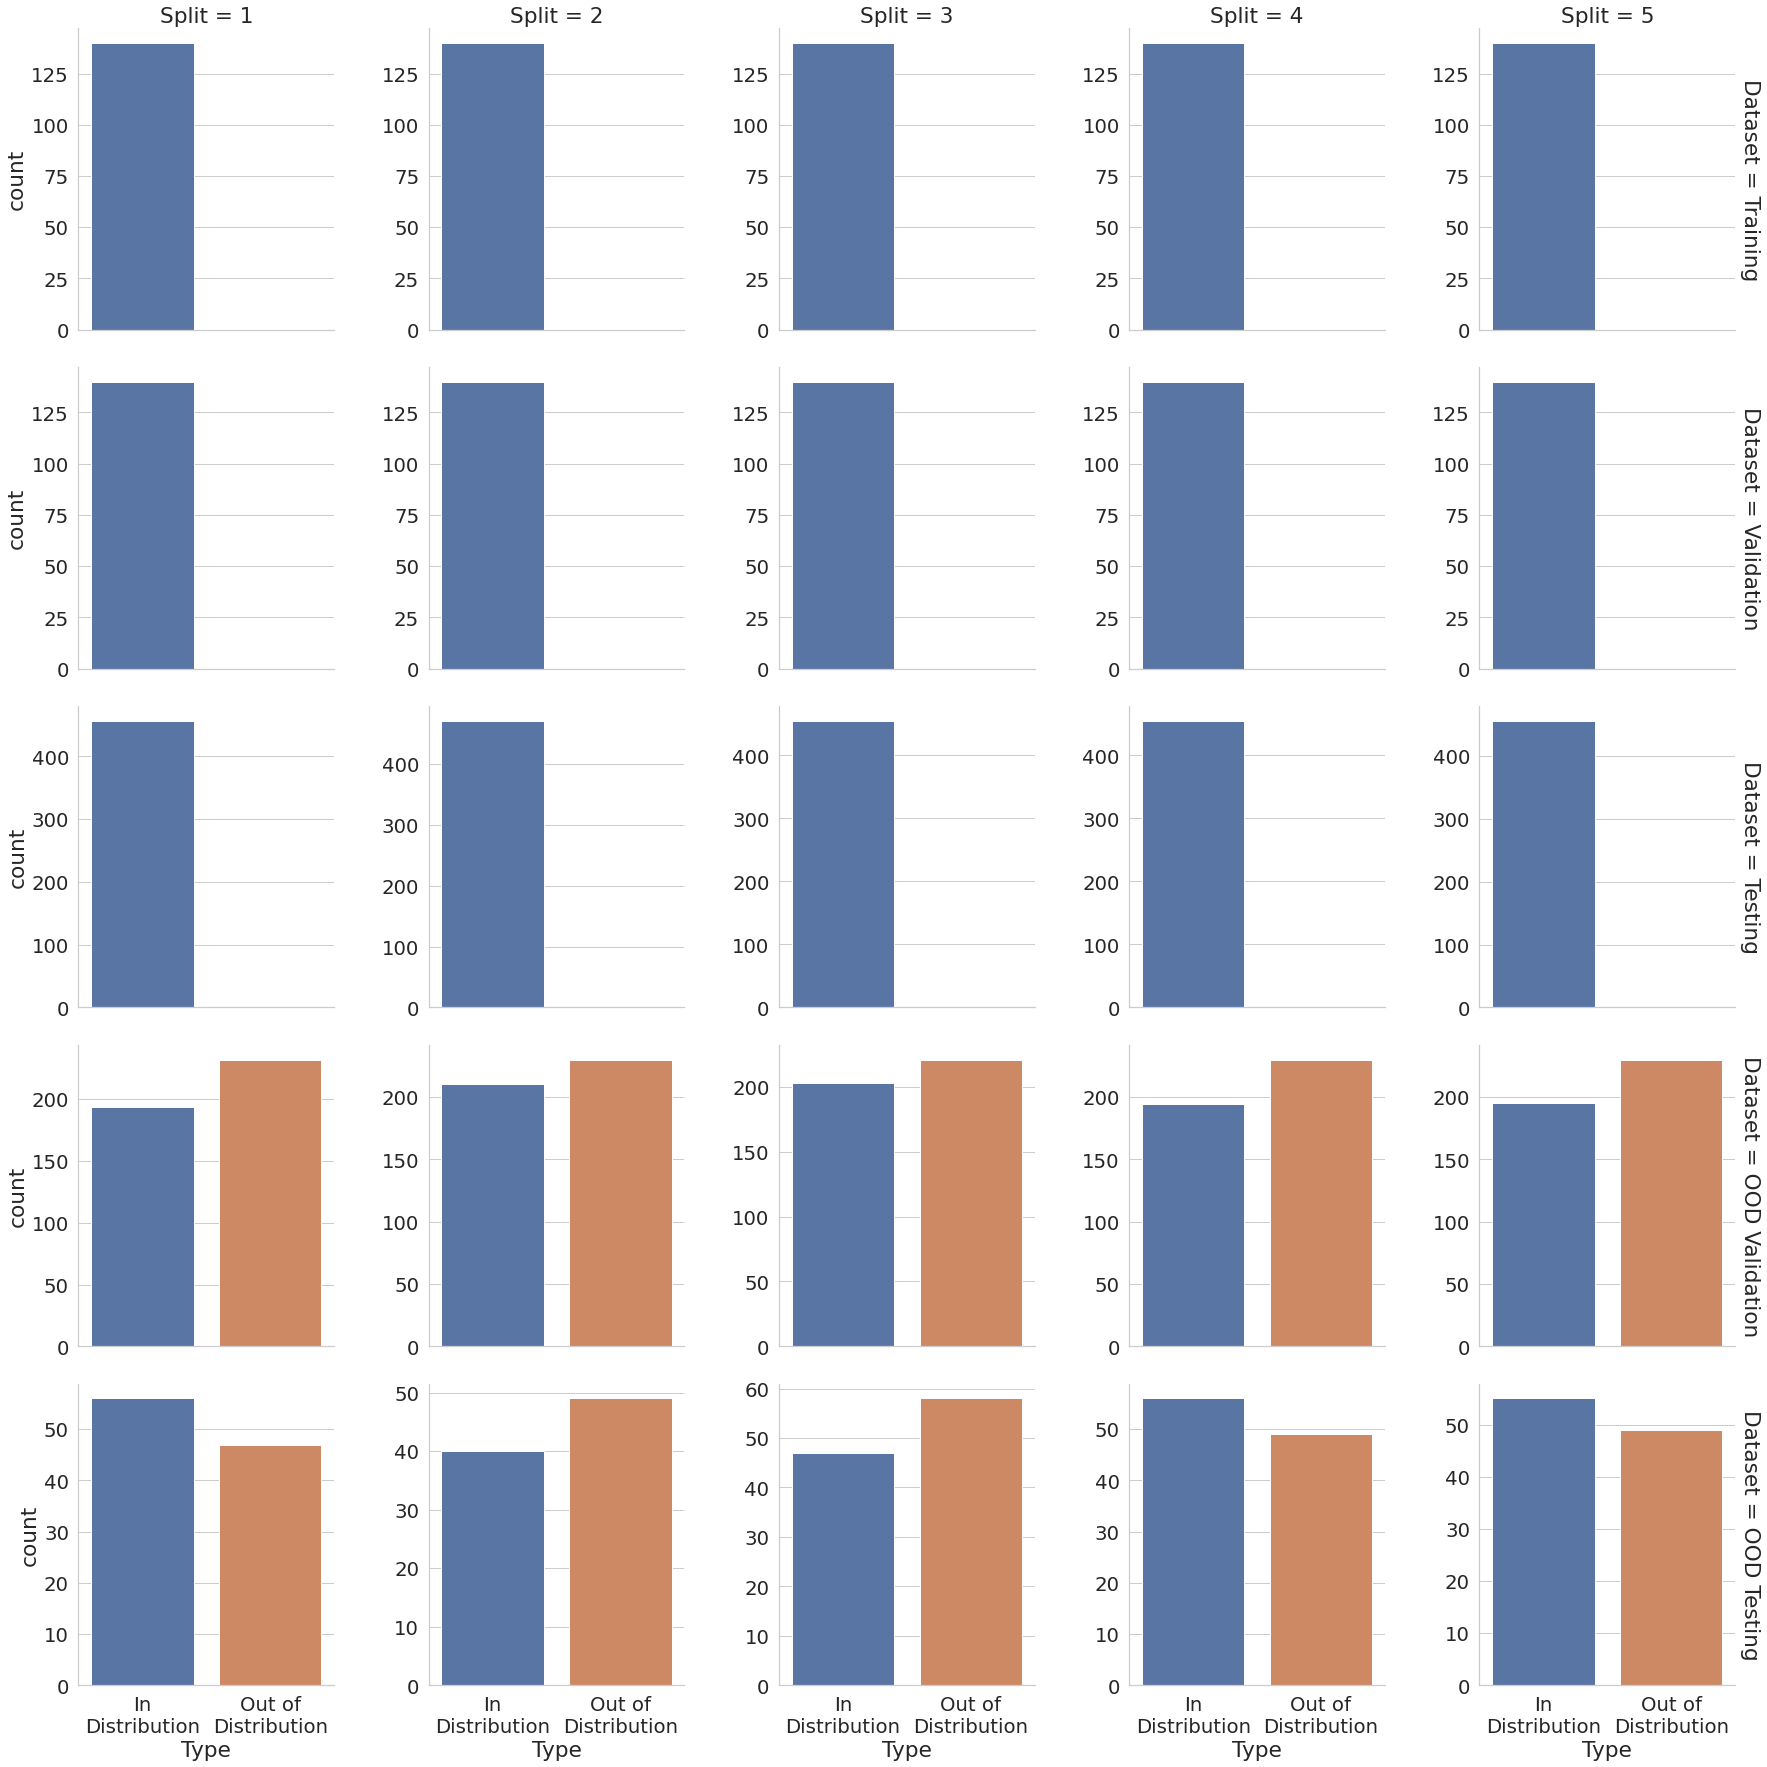

In [19]:
sns.set(context='notebook', font_scale=1.8)
sns.set_style("whitegrid")
g = sns.catplot(data = df_labels, row = 'Dataset', col = 'Split', kind = 'count', x = 'Type', sharey = False, margin_titles=True)
#g.set(xticklabels=[])